In [146]:
import pandas as pd
import numpy as np
import datetime
import pytz
import matplotlib.pyplot as plt

In [147]:
#making it less work to read all files by saving the file_paths in a dictionary
import os

data = {}

directory = os.path.join("c:\\", "Users", "20202478", "Documents", "Uni", "JADS Master","Semester 1","Data Mining","Data-mining","FinalData")
#directory = os.path.join("c:\\", "Users", "20192801", "Documents", "data mining", "FinalData")

for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            current_folder = os.path.basename(root)  # Get the name of the immediate folder
            parent_folder = os.path.basename(os.path.dirname(root))  # Get the name of the parent folder
            key = f"{parent_folder}_{current_folder}"  # Concatenate folder names to create the key
            file_path = os.path.join(root, file)
            if key not in data:
                data[key] = []  # Initialize list if key is encountered for the first time
            data[key].append(file_path)  # Append file path to the list

In [148]:
#for key, file_paths in data.items():
#    print(f"Key: {key}")
#    for file_path in file_paths:
#        print(f"File Path: {file_path}")

In [149]:
# Printing the file names and their respective paths as an example
Tjielke_HEARTRATE_AUTO = pd.read_csv(data["Tjielke_data_HEARTRATE_AUTO"][0])
Tjielke_ACTIVITY_MINUTE = pd.read_csv(data["Tjielke_data_ACTIVITY_MINUTE"][0])
Tjielke_SPORT = pd.read_csv(data["Tjielke_data_SPORT"][0])
Tjielke_SLEEP = pd.read_csv(data["Tjielke_data_SLEEP"][0],error_bad_lines=False)

George_HEARTRATE_AUTO = pd.read_csv(data["data_george_all_HEARTRATE_AUTO"][0])
George_ACTIVITY_MINUTE = pd.read_csv(data["data_george_all_ACTIVITY_MINUTE"][0])
George_SPORT = pd.read_csv(data["data_george_all_SPORT"][0])
George_SLEEP = pd.read_csv(data["data_george_all_SLEEP"][0],error_bad_lines=False)

Yidan_HEARTRATE_AUTO = pd.read_csv(data["Yidan  (until 21 Nov)_HEARTRATE_AUTO"][0])
Yidan_ACTIVITY_MINUTE = pd.read_csv(data["Yidan  (until 21 Nov)_ACTIVITY_MINUTE"][0])
Yidan_SPORT = pd.read_csv(data["Yidan  (until 21 Nov)_SPORT"][0])
Yidan_SLEEP = pd.read_csv(data["Yidan  (until 21 Nov)_SLEEP"][0],error_bad_lines=False)

Lars_HEARTRATE_AUTO = pd.read_csv(data["dataLars3_HEARTRATE_AUTO"][0])
Lars_ACTIVITY_MINUTE = pd.read_csv(data["dataLars3_ACTIVITY_MINUTE"][0])
Lars_SPORT = pd.read_csv(data["dataLars3_SPORT"][0])
Lars_SLEEP = pd.read_csv(data["dataLars3_SLEEP"][0],error_bad_lines=False)

C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\1478017207.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Tjielke_SLEEP = pd.read_csv(data["Tjielke_data_SLEEP"][0],error_bad_lines=False)
C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\1478017207.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  George_SLEEP = pd.read_csv(data["data_george_all_SLEEP"][0],error_bad_lines=False)
C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\1478017207.py:15: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Yidan_SLEEP = pd.read_csv(data["Yidan  (until 21 Nov)_SLEEP"][0],error_bad_lines=False)
C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\1478017207.py:20: FutureWarning: The error_bad_lines argument ha

In [6]:
Tjielke_ACTIVITY_MINUTE

,date,time,steps
0,2023-09-12,10:10,7
1,2023-09-12,10:12,44
2,2023-09-12,10:13,30
3,2023-09-12,10:14,17
4,2023-09-12,10:15,15
...,...,...,...
10874,2023-11-21,21:20,23
10875,2023-11-21,22:05,10
10876,2023-11-21,22:45,9
10877,2023-11-21,22:46,23


In [7]:
def Convert_to_timezone_amsterdam(heartrate,activity_minute,sport,sleep):
    heartrate['datetime'] = heartrate['date']+" "+heartrate['time']
    heartrate['datetime'] = pd.to_datetime(heartrate['datetime'])
    heartrate.drop(['date','time'],axis=1,inplace=True)
    heartrate["datetime"] = pd.to_datetime(heartrate["datetime"]).dt.tz_localize('Europe/Amsterdam',ambiguous='NaT')
    activity_minute['datetime'] = activity_minute['date']+" "+activity_minute['time']
    activity_minute['datetime'] = pd.to_datetime(activity_minute['datetime'])
    activity_minute.drop(['date','time'],axis=1,inplace=True)
    activity_minute["datetime"] = pd.to_datetime(activity_minute["datetime"]).dt.tz_localize('Europe/Amsterdam',ambiguous='NaT')
    sleep["start"] = pd.to_datetime(sleep["start"]).dt.tz_convert('Europe/Amsterdam')
    sleep["stop"] = pd.to_datetime(sleep["stop"]).dt.tz_convert('Europe/Amsterdam')
    sport["startTime"] = pd.to_datetime(sport["startTime"]).dt.tz_convert('Europe/Amsterdam')
    return heartrate,activity_minute,sport,sleep

In [150]:
George_HEARTRATE_AUTO, George_ACTIVITY_MINUTE, George_SPORT, George_SLEEP = Convert_to_timezone_amsterdam(George_HEARTRATE_AUTO, George_ACTIVITY_MINUTE, George_SPORT, George_SLEEP)
Tjielke_HEARTRATE_AUTO, Tjielke_ACTIVITY_MINUTE, Tjielke_SPORT, Tjielke_SLEEP = Convert_to_timezone_amsterdam(Tjielke_HEARTRATE_AUTO, Tjielke_ACTIVITY_MINUTE, Tjielke_SPORT, Tjielke_SLEEP)
Yidan_HEARTRATE_AUTO, Yidan_ACTIVITY_MINUTE, Yidan_SPORT, Yidan_SLEEP = Convert_to_timezone_amsterdam(Yidan_HEARTRATE_AUTO, Yidan_ACTIVITY_MINUTE, Yidan_SPORT, Yidan_SLEEP)
Lars_HEARTRATE_AUTO, Lars_ACTIVITY_MINUTE, Lars_SPORT, Lars_SLEEP = Convert_to_timezone_amsterdam(Lars_HEARTRATE_AUTO, Lars_ACTIVITY_MINUTE, Lars_SPORT, Lars_SLEEP)

In [166]:
#walking Tjielke:
    #14 tm 21
Tjielke_HEART_select = Tjielke_HEARTRATE_AUTO.loc[(Tjielke_HEARTRATE_AUTO['datetime'] >= '2023-11-14')
                     & (Tjielke_HEARTRATE_AUTO['datetime'] < '2023-11-22')]
Tjielke_SLEEP_start_select = Tjielke_SLEEP.loc[(Tjielke_SLEEP['start'] >= '2023-11-14')
                     & (Tjielke_SLEEP['stop'] < '2023-11-22')]
Tjielke_ACTIVITY_MINUTE_select = Tjielke_ACTIVITY_MINUTE.loc[(Tjielke_ACTIVITY_MINUTE['datetime'] >= '2023-11-14')
                     & (Tjielke_ACTIVITY_MINUTE['datetime'] < '2023-11-22')]
#walking George
    #16 tm 23
George_HEART_select = George_HEARTRATE_AUTO.loc[(George_HEARTRATE_AUTO['datetime'] >= '2023-11-16')
                     & (George_HEARTRATE_AUTO['datetime'] < '2023-11-24')]
George_SLEEP_start_select = George_SLEEP.loc[(George_SLEEP['start'] >= '2023-11-16')
                     & (George_SLEEP['stop'] < '2023-11-24')]
George_ACTIVITY_MINUTE_select = George_ACTIVITY_MINUTE.loc[(George_ACTIVITY_MINUTE['datetime'] >= '2023-11-16')
                     & (George_ACTIVITY_MINUTE['datetime'] < '2023-11-24')]
#walking Yidan
    #16 tm 20
Yidan_HEART_select = Yidan_HEARTRATE_AUTO.loc[(Yidan_HEARTRATE_AUTO['datetime'] >= '2023-11-16')
                     & (Yidan_HEARTRATE_AUTO['datetime'] < '2023-11-21')]
Yidan_SLEEP_start_select = Yidan_SLEEP.loc[(Yidan_SLEEP['start'] >= '2023-11-16')
                     & (Yidan_SLEEP['stop'] < '2023-11-21')]
Yidan_ACTIVITY_MINUTE_select = Yidan_ACTIVITY_MINUTE.loc[(Yidan_ACTIVITY_MINUTE['datetime'] >= '2023-11-15')
                     & (Yidan_ACTIVITY_MINUTE['datetime'] < '2023-11-21')]

#walking Lars
    #25 tm 01
Lars_HEART_select = Lars_HEARTRATE_AUTO.loc[(Lars_HEARTRATE_AUTO['datetime'] >= '2023-11-12')
                     & (Lars_HEARTRATE_AUTO['datetime'] < '2023-11-19')]
Lars_SLEEP_start_select = Lars_SLEEP.loc[(Lars_SLEEP['start'] >= '2023-11-12')
                     & (Yidan_SLEEP['stop'] < '2023-11-19')]
Lars_ACTIVITY_MINUTE_select = Lars_ACTIVITY_MINUTE.loc[(Lars_ACTIVITY_MINUTE['datetime'] >= '2023-11-12')
                     & (Lars_ACTIVITY_MINUTE['datetime'] < '2023-11-19')]

In [174]:
# #control Tjielke:
#     #14 tm 21
Tjielke_HEART_select_c = Tjielke_HEARTRATE_AUTO.loc[(Tjielke_HEARTRATE_AUTO['datetime'] >= '2023-10-14')
                    & (Tjielke_HEARTRATE_AUTO['datetime'] < '2023-10-22')]
Tjielke_SLEEP_start_select_c = Tjielke_SLEEP.loc[(Tjielke_SLEEP['start'] >= '2023-10-14')
                    & (Tjielke_SLEEP['start'] < '2023-10-22')]
# Tjielke_SLEEP_stop_select = Tjielke_SLEEP.loc[(Tjielke_SLEEP['stop'] >= '2023-10-14')
#                      & (Tjielke_SLEEP['stop'] < '2023-10-22')]
Tjielke_ACTIVITY_MINUTE_select_c = Tjielke_ACTIVITY_MINUTE.loc[(Tjielke_ACTIVITY_MINUTE['datetime'] >= '2023-10-14')
                    & (Tjielke_ACTIVITY_MINUTE['datetime'] < '2023-10-22')]
# #control George
#     #16 tm 23
George_HEART_select_c = George_HEARTRATE_AUTO.loc[(George_HEARTRATE_AUTO['datetime'] >= '2023-10-28')
                     & (George_HEARTRATE_AUTO['datetime'] < '2023-11-06')]
George_SLEEP_start_select_c = George_SLEEP.loc[(George_SLEEP['start'] >= '2023-10-28')
                     & (George_SLEEP['start'] < '2023-11-06')]
# George_SLEEP_stop_select = George_SLEEP.loc[(George_SLEEP['stop'] >= '2023-10-28')
#                      & (George_SLEEP['stop'] < '2023-11-06')]
George_ACTIVITY_MINUTE_select_c = George_ACTIVITY_MINUTE.loc[(George_ACTIVITY_MINUTE['datetime'] >= '2023-10-28')
                     & (George_ACTIVITY_MINUTE['datetime'] < '2023-11-06')]
# #control Yidan
#     #16 tm 20
Yidan_HEART_select_c = Yidan_HEARTRATE_AUTO.loc[(Yidan_HEARTRATE_AUTO['datetime'] >= '2023-10-16')
                     & (Yidan_HEARTRATE_AUTO['datetime'] < '2023-10-24')]
Yidan_SLEEP_start_select_c = Yidan_SLEEP.loc[(Yidan_SLEEP['start'] >= '2023-10-16')
                     & (Yidan_SLEEP['start'] < '2023-10-24')]
# Yidan_SLEEP_stop_select = Yidan_SLEEP.loc[(Yidan_SLEEP['stop'] >= '2023-10-16')
#                      & (Yidan_SLEEP['stop'] < '2023-10-24')]
Yidan_ACTIVITY_MINUTE_select_c = Yidan_ACTIVITY_MINUTE.loc[(Yidan_ACTIVITY_MINUTE['datetime'] >= '2023-10-16')
                     & (Yidan_ACTIVITY_MINUTE['datetime'] < '2023-10-24')]

#control Lars
    #11 tm 26
Lars_HEART_select_c = Lars_HEARTRATE_AUTO.loc[(Lars_HEARTRATE_AUTO['datetime'] >= '2023-11-05')
                     & (Lars_HEARTRATE_AUTO['datetime'] < '2023-11-12')]
Lars_SLEEP_start_select_c = Lars_SLEEP.loc[(Lars_SLEEP['start'] >= '2023-11-05')
                     & (Yidan_SLEEP['stop'] < '2023-11-12')]
Lars_ACTIVITY_MINUTE_select_c = Lars_ACTIVITY_MINUTE.loc[(Lars_ACTIVITY_MINUTE['datetime'] >= '2023-11-05')
                     & (Lars_ACTIVITY_MINUTE['datetime'] < '2023-11-12')]

In [160]:
def lowest_30(sleepstart,heartrate):
    sleepstart['lowest_30_heartrates'] = 0
    for i in range(len(sleepstart)):
        start = sleepstart['start'].iloc[i]
        stop = sleepstart['stop'].iloc[i]
        heartrate_during_sleep = heartrate[(heartrate['datetime']>=start) & (heartrate['datetime']<= stop)]
        sleepstart['lowest_30_heartrates'].iloc[i] = heartrate_during_sleep.loc[:, 'heartRate'].nsmallest(30).mean()
    return sleepstart

In [161]:
def walk_before_bed(sleepstart,activity):
    sleepstart['start-1hour'] = sleepstart['start'] - datetime.timedelta(hours=1)
    sleepstart['activity_before_bed'] = 0
    for i in range(len(sleepstart)):
        start = sleepstart['start-1hour'].iloc[i]
        stop = sleepstart['start'].iloc[i]
        activity_before_sleep = activity[(activity['datetime']>=start) & (activity['datetime']<= stop)]
        sleepstart['activity_before_bed'].iloc[i] = activity_before_sleep.loc[:, 'steps'].sum()
    return sleepstart

In [162]:
def change_sleep_start(sleepstart,activity_minute):
    for i in range(len(sleepstart)):
        cut_steps_before_bed = activity_minute[activity_minute['datetime'] <= sleepstart['start'].iloc[i]].iloc[::-1]
        counter = 0 
        sleepstart['start'].iloc[i] = cut_steps_before_bed['datetime'].iloc[counter]
        while cut_steps_before_bed['steps'].iloc[counter]<= 10:
            sleepstart['start'].iloc[i] = cut_steps_before_bed['datetime'].iloc[counter]
            counter += 1
    return sleepstart

In [23]:
Yidan_SPORT[(Yidan_SPORT['startTime']>=Yidan_SLEEP_start_select['start-1hour'].iloc[3]) & (Yidan_SPORT['startTime']<=Yidan_SLEEP_start_select['start'].iloc[3])]

KeyError: 'start-1hour'

In [24]:
Yidan_SPORT

,type,startTime,sportTime(s),maxPace(/meter),minPace(/meter),distance(m),avgPace(/meter),calories(kcal)
0,6,2023-11-20 21:14:38+01:00,2405,0.707075,-1.0,1863.0,1.290721,133.0
1,6,2023-11-19 21:25:29+01:00,3011,0.745078,-1.0,1703.0,1.767738,136.0
2,24,2023-11-19 11:40:29+01:00,8312,-1.000000,-1.0,0.0,-1.000000,449.0
3,24,2023-11-18 11:38:41+01:00,33415,-1.000000,-1.0,0.0,-1.000000,1604.0
4,6,2023-11-17 23:47:26+01:00,1636,1.183432,-1.0,185.0,6.001000,68.0
5,6,2023-11-16 20:50:44+01:00,1533,0.711184,-1.0,742.0,2.065402,78.0
6,6,2023-11-14 21:02:57+01:00,9784,1.238338,-1.0,15.0,6.001000,342.0
7,24,2023-11-09 09:49:25+01:00,2811,-1.000000,-1.0,0.0,-1.000000,225.0
8,6,2023-11-07 17:28:21+01:00,6872,0.581381,-1.0,1272.0,5.397917,256.0
9,6,2023-11-01 14:53:13+01:00,912,0.809818,-1.0,912.0,0.999350,53.0


In [25]:
Yidan_SLEEP_start_select

,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop,REMTime,naps
56,2023-11-16,80.0,327.0,0.0,2023-11-16 01:00:00+01:00,2023-11-16 09:24:00+01:00,97.0,NaN
57,2023-11-17,105.0,312.0,3.0,2023-11-17 00:16:00+01:00,2023-11-17 08:31:00+01:00,75.0,NaN
58,2023-11-18,46.0,379.0,1.0,2023-11-18 01:19:00+01:00,2023-11-18 10:58:00+01:00,153.0,NaN
59,2023-11-19,71.0,370.0,1.0,2023-11-19 01:37:00+01:00,2023-11-19 10:32:00+01:00,93.0,NaN
60,2023-11-20,98.0,270.0,12.0,2023-11-20 00:17:00+01:00,2023-11-20 08:30:00+01:00,113.0,NaN


In [26]:
def add_sport_to_activity(sleepstart, sport):
    for i in range(len(sleepstart)):
        sport_steps = 0
        if 

SyntaxError: invalid syntax (1541558868.py, line 4)

In [167]:
Tjielke_SLEEP_start_select = change_sleep_start(Tjielke_SLEEP_start_select,Tjielke_ACTIVITY_MINUTE_select)
Tjielke_SLEEP_start_select = lowest_30(Tjielke_SLEEP_start_select,Tjielke_HEART_select)
Tjielke_SLEEP_start_select = walk_before_bed(Tjielke_SLEEP_start_select,Tjielke_ACTIVITY_MINUTE_select)
George_SLEEP_start_select = change_sleep_start(George_SLEEP_start_select,George_ACTIVITY_MINUTE_select)
George_SLEEP_start_select = lowest_30(George_SLEEP_start_select,George_HEART_select)
George_SLEEP_start_select = walk_before_bed(George_SLEEP_start_select,George_ACTIVITY_MINUTE_select)
Yidan_SLEEP_start_select = change_sleep_start(Yidan_SLEEP_start_select,Yidan_ACTIVITY_MINUTE_select)
Yidan_SLEEP_start_select = lowest_30(Yidan_SLEEP_start_select,Yidan_HEART_select)
Yidan_SLEEP_start_select = walk_before_bed(Yidan_SLEEP_start_select,Yidan_ACTIVITY_MINUTE_select)
#Yidan_SLEEP_start_select = add_sport_to_activity(Yidan_SLEEP_start_select,Yidan_SPORT)
#Tjielke_SLEEP_start_select.drop(71,inplace=True)

Lars_SLEEP_start_select = change_sleep_start(Lars_SLEEP_start_select,Lars_ACTIVITY_MINUTE_select)
Lars_SLEEP_start_select = lowest_30(Lars_SLEEP_start_select,Lars_HEART_select)
Lars_SLEEP_start_select = walk_before_bed(Lars_SLEEP_start_select,Lars_ACTIVITY_MINUTE_select)

C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\2314429212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleepstart['start'].iloc[i] = cut_steps_before_bed['datetime'].iloc[counter]
C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\2314429212.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleepstart['start'].iloc[i] = cut_steps_before_bed['datetime'].iloc[counter]
C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\2038214476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [16]:
Yidan_SPORT.head(7)

,type,startTime,sportTime(s),maxPace(/meter),minPace(/meter),distance(m),avgPace(/meter),calories(kcal)
0,6,2023-11-20 21:14:38+01:00,2405,0.707075,-1.0,1863.0,1.290721,133.0
1,6,2023-11-19 21:25:29+01:00,3011,0.745078,-1.0,1703.0,1.767738,136.0
2,24,2023-11-19 11:40:29+01:00,8312,-1.000000,-1.0,0.0,-1.000000,449.0
3,24,2023-11-18 11:38:41+01:00,33415,-1.000000,-1.0,0.0,-1.000000,1604.0
4,6,2023-11-17 23:47:26+01:00,1636,1.183432,-1.0,185.0,6.001000,68.0
5,6,2023-11-16 20:50:44+01:00,1533,0.711184,-1.0,742.0,2.065402,78.0
6,6,2023-11-14 21:02:57+01:00,9784,1.238338,-1.0,15.0,6.001000,342.0


In [17]:
Yidan_SLEEP_start_select

,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop,REMTime,naps,lowest_30_heartrates,start-1hour,activity_before_bed
56,2023-11-16,80.0,327.0,0.0,2023-11-16 01:00:00+01:00,2023-11-16 09:24:00+01:00,97.0,NaN,51.800000,2023-11-16 00:00:00+01:00,9
57,2023-11-17,105.0,312.0,3.0,2023-11-17 00:16:00+01:00,2023-11-17 08:31:00+01:00,75.0,NaN,49.666667,2023-11-16 23:16:00+01:00,15
58,2023-11-18,46.0,379.0,1.0,2023-11-18 01:19:00+01:00,2023-11-18 10:58:00+01:00,153.0,NaN,49.033333,2023-11-18 00:19:00+01:00,53
59,2023-11-19,71.0,370.0,1.0,2023-11-19 01:37:00+01:00,2023-11-19 10:32:00+01:00,93.0,NaN,52.366667,2023-11-19 00:37:00+01:00,79
60,2023-11-20,98.0,270.0,12.0,2023-11-20 00:17:00+01:00,2023-11-20 08:30:00+01:00,113.0,NaN,51.166667,2023-11-19 23:17:00+01:00,24


In [18]:
Yidan_ACTIVITY_MINUTE_select[Yidan_ACTIVITY_MINUTE_select['datetime']<=Yidan_SLEEP_start_select['start'].iloc[2]].iloc[::-1]

,steps,datetime
8598,6,2023-11-18 01:12:00+01:00
8597,7,2023-11-18 01:07:00+01:00
8596,9,2023-11-18 01:06:00+01:00
8595,31,2023-11-18 00:20:00+01:00
8594,1,2023-11-18 00:17:00+01:00
...,...,...
8073,17,2023-11-15 10:47:00+01:00
8072,6,2023-11-15 10:34:00+01:00
8071,6,2023-11-15 10:28:00+01:00
8070,47,2023-11-15 01:55:00+01:00


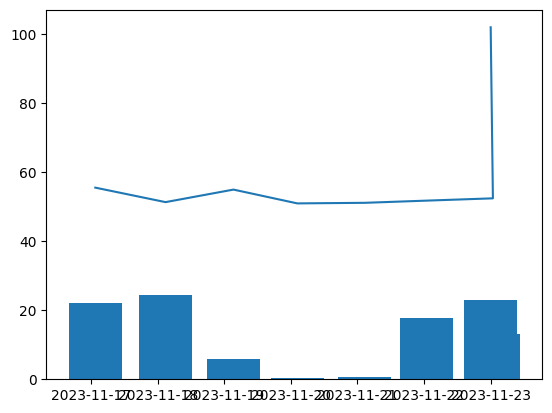

In [19]:
plt.plot(George_SLEEP_start_select['start'],George_SLEEP_start_select['lowest_30_heartrates'])
plt.bar(George_SLEEP_start_select['start'],(George_SLEEP_start_select['activity_before_bed']/100))
plt.show()

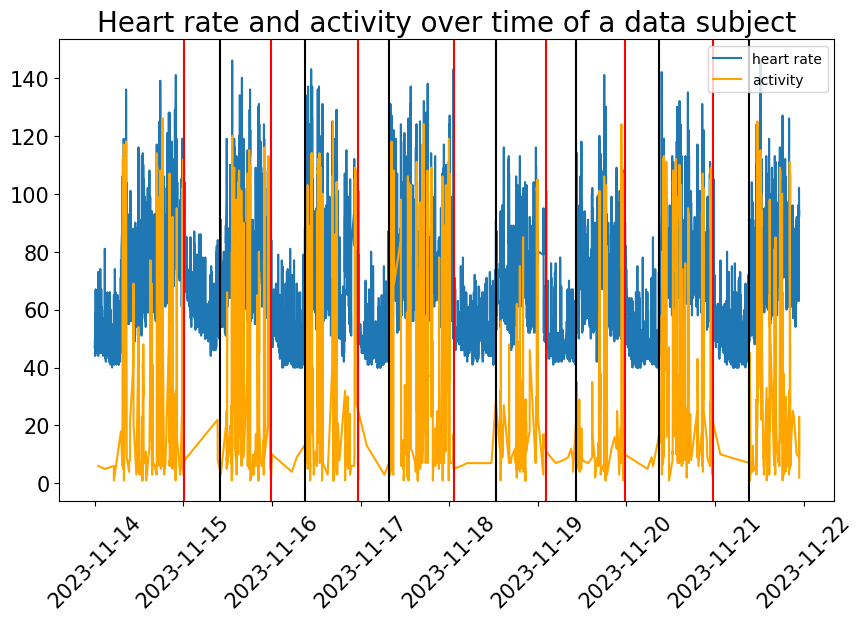

In [40]:
#Tjielke

plt.figure(figsize=(10, 6))
plt.plot(Tjielke_HEART_select['datetime'],Tjielke_HEART_select['heartRate'])
plt.plot(Tjielke_ACTIVITY_MINUTE_select['datetime'],Tjielke_ACTIVITY_MINUTE_select['steps'],color='orange')
for line in Tjielke_SLEEP_start_select['start']:
    plt.axvline(x=line, color='red', linestyle='-', label='Vertical Line')
for line in Tjielke_SLEEP_start_select['stop']:
    plt.axvline(x=line, color='black', linestyle='-', label='Vertical Line')
plt.title('Heart rate and activity over time of a data subject', size = 20)
plt.xticks(size = 15, rotation = 45)
plt.yticks(size = 15)
plt.legend(['heart rate','activity'])
plt.show()

NameError: name 'George_SLEEP_stop_select' is not defined

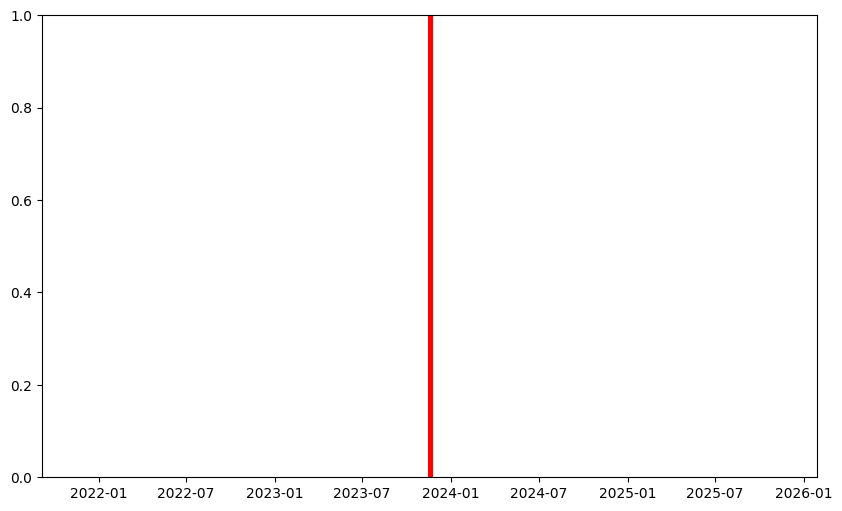

In [21]:
#George
plt.figure(figsize=(10, 6))
for line in George_SLEEP_start_select['start']:
    plt.axvline(x=line, color='red', linestyle='-', label='Vertical Line')
for line in George_SLEEP_stop_select['stop']:
    plt.axvline(x=line, color='black', linestyle='-', label='Vertical Line')
plt.plot(George_HEART_select['datetime'],George_HEART_select['heartRate'])
plt.plot(George_ACTIVITY_MINUTE_select['datetime'],George_ACTIVITY_MINUTE_select['steps'])

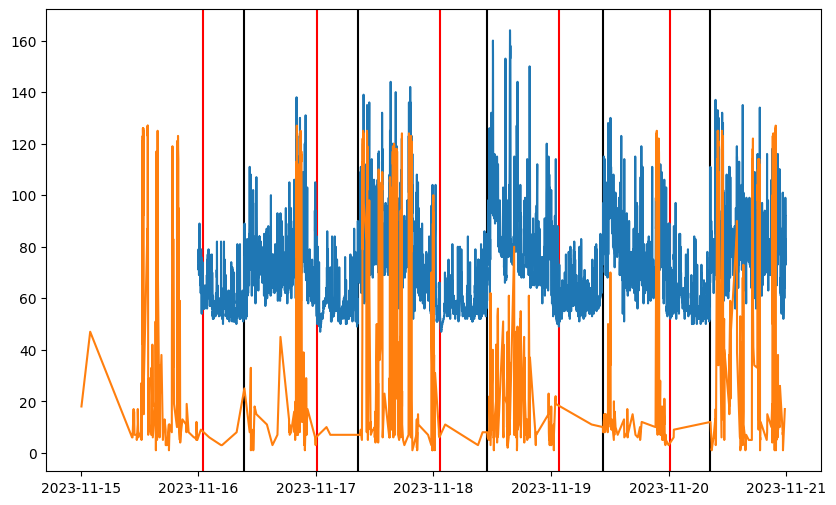

In [35]:
#Yidan
plt.figure(figsize=(10, 6))
for line in Yidan_SLEEP_start_select['start']:
    plt.axvline(x=line, color='red', linestyle='-', label='Vertical Line')
for line in Yidan_SLEEP_start_select['stop']:
    plt.axvline(x=line, color='black', linestyle='-', label='Vertical Line')
plt.plot(Yidan_HEART_select['datetime'],Yidan_HEART_select['heartRate'])
plt.plot(Yidan_ACTIVITY_MINUTE_select['datetime'],Yidan_ACTIVITY_MINUTE_select['steps'])

In [175]:
Tjielke_SLEEP_start_select_c = change_sleep_start(Tjielke_SLEEP_start_select_c,Tjielke_ACTIVITY_MINUTE_select_c)
Tjielke_SLEEP_start_select_c = lowest_30(Tjielke_SLEEP_start_select_c,Tjielke_HEART_select_c)
Tjielke_SLEEP_start_select_c = walk_before_bed(Tjielke_SLEEP_start_select_c,Tjielke_ACTIVITY_MINUTE_select_c)

George_SLEEP_start_select_c = change_sleep_start(George_SLEEP_start_select_c,George_ACTIVITY_MINUTE_select_c)
George_SLEEP_start_select_c = lowest_30(George_SLEEP_start_select_c,George_HEART_select_c)
George_SLEEP_start_select_c = walk_before_bed(George_SLEEP_start_select_c,George_ACTIVITY_MINUTE_select_c)

Yidan_SLEEP_start_select_c = change_sleep_start(Yidan_SLEEP_start_select_c,Yidan_ACTIVITY_MINUTE_select_c)
Yidan_SLEEP_start_select_c = lowest_30(Yidan_SLEEP_start_select_c,Yidan_HEART_select_c)
Yidan_SLEEP_start_select_c = walk_before_bed(Yidan_SLEEP_start_select_c,Yidan_ACTIVITY_MINUTE_select_c)

Lars_SLEEP_start_select_c = change_sleep_start(Lars_SLEEP_start_select_c,Lars_ACTIVITY_MINUTE_select_c)
Lars_SLEEP_start_select_c = lowest_30(Lars_SLEEP_start_select_c,Lars_HEART_select_c)
Lars_SLEEP_start_select_c = walk_before_bed(Lars_SLEEP_start_select_c,Lars_ACTIVITY_MINUTE_select_c)

C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\2314429212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleepstart['start'].iloc[i] = cut_steps_before_bed['datetime'].iloc[counter]
C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\2314429212.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleepstart['start'].iloc[i] = cut_steps_before_bed['datetime'].iloc[counter]
C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\2038214476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [192]:
Tjielke_treatment = Tjielke_SLEEP_start_select[0:7]
Tjielke_treatment['days'] = [1,2,3,4,5,6,7]


George_treatment = George_SLEEP_start_select[0:7]
George_treatment['days'] = [1,2,3,4,5,6,7]

Yidan_treatment = Yidan_SLEEP_start_select
Yidan_treatment['days'] = [1,2,3,4,5]

Lars_treatment = Lars_SLEEP_start_select.iloc[0:5]
Lars_treatment['days'] = [1,2,3,4,5]
Lars_treatment

C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\198472592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tjielke_treatment['days'] = [1,2,3,4,5,6,7]
C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\198472592.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  George_treatment['days'] = [1,2,3,4,5,6,7]
C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\198472592.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop,REMTime,naps,lowest_30_heartrates,start-1hour,activity_before_bed,days
36,2023-11-12,0,0,0,2023-11-13 00:00:00+01:00,2023-11-13 00:00:00+01:00,0,NaN,NaN,2023-11-12 23:00:00+01:00,541,1
37,2023-11-15,60,291,0,2023-11-15 02:43:00+01:00,2023-11-15 08:44:00+01:00,0,NaN,55.900000,2023-11-15 01:43:00+01:00,557,2
38,2023-11-17,60,399,10,2023-11-17 02:37:00+01:00,2023-11-17 10:38:00+01:00,0,NaN,50.966667,2023-11-17 01:37:00+01:00,1141,3
39,2023-11-18,46,320,0,2023-11-18 03:10:00+01:00,2023-11-18 09:31:00+01:00,0,NaN,51.800000,2023-11-18 02:10:00+01:00,1264,4
40,2023-11-19,39,401,8,2023-11-18 23:56:00+01:00,2023-11-19 10:53:00+01:00,0,NaN,80.000000,2023-11-18 22:56:00+01:00,833,5


In [199]:
Tjielke_control = Tjielke_SLEEP_start_select_c
Tjielke_control['days'] = [1,2,3,4,5,6,7,8,9]
Tjielke_control = Tjielke_control[Tjielke_control['days'] <= 7]

George_control = George_SLEEP_start_select_c
George_control['days'] = [1,2,3,4,5,6,7,8]
George_control = George_control[George_control['days'] <= 7]

Yidan_control = Yidan_SLEEP_start_select_c
Yidan_control['days'] = [1,2,3,4,5,6]
Yidan_control = Yidan_control[Yidan_control['days'] <= 5]

Lars_control = Lars_SLEEP_start_select_c[0:5]
Lars_control['days'] = [1,2,3,4,5]
Lars_control = Lars_control[Lars_control['days'] <= 5]


C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\764179012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tjielke_control['days'] = [1,2,3,4,5,6,7,8,9]
C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\764179012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  George_control['days'] = [1,2,3,4,5,6,7,8]
C:\Users\20202478\AppData\Local\Temp\ipykernel_2596\764179012.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

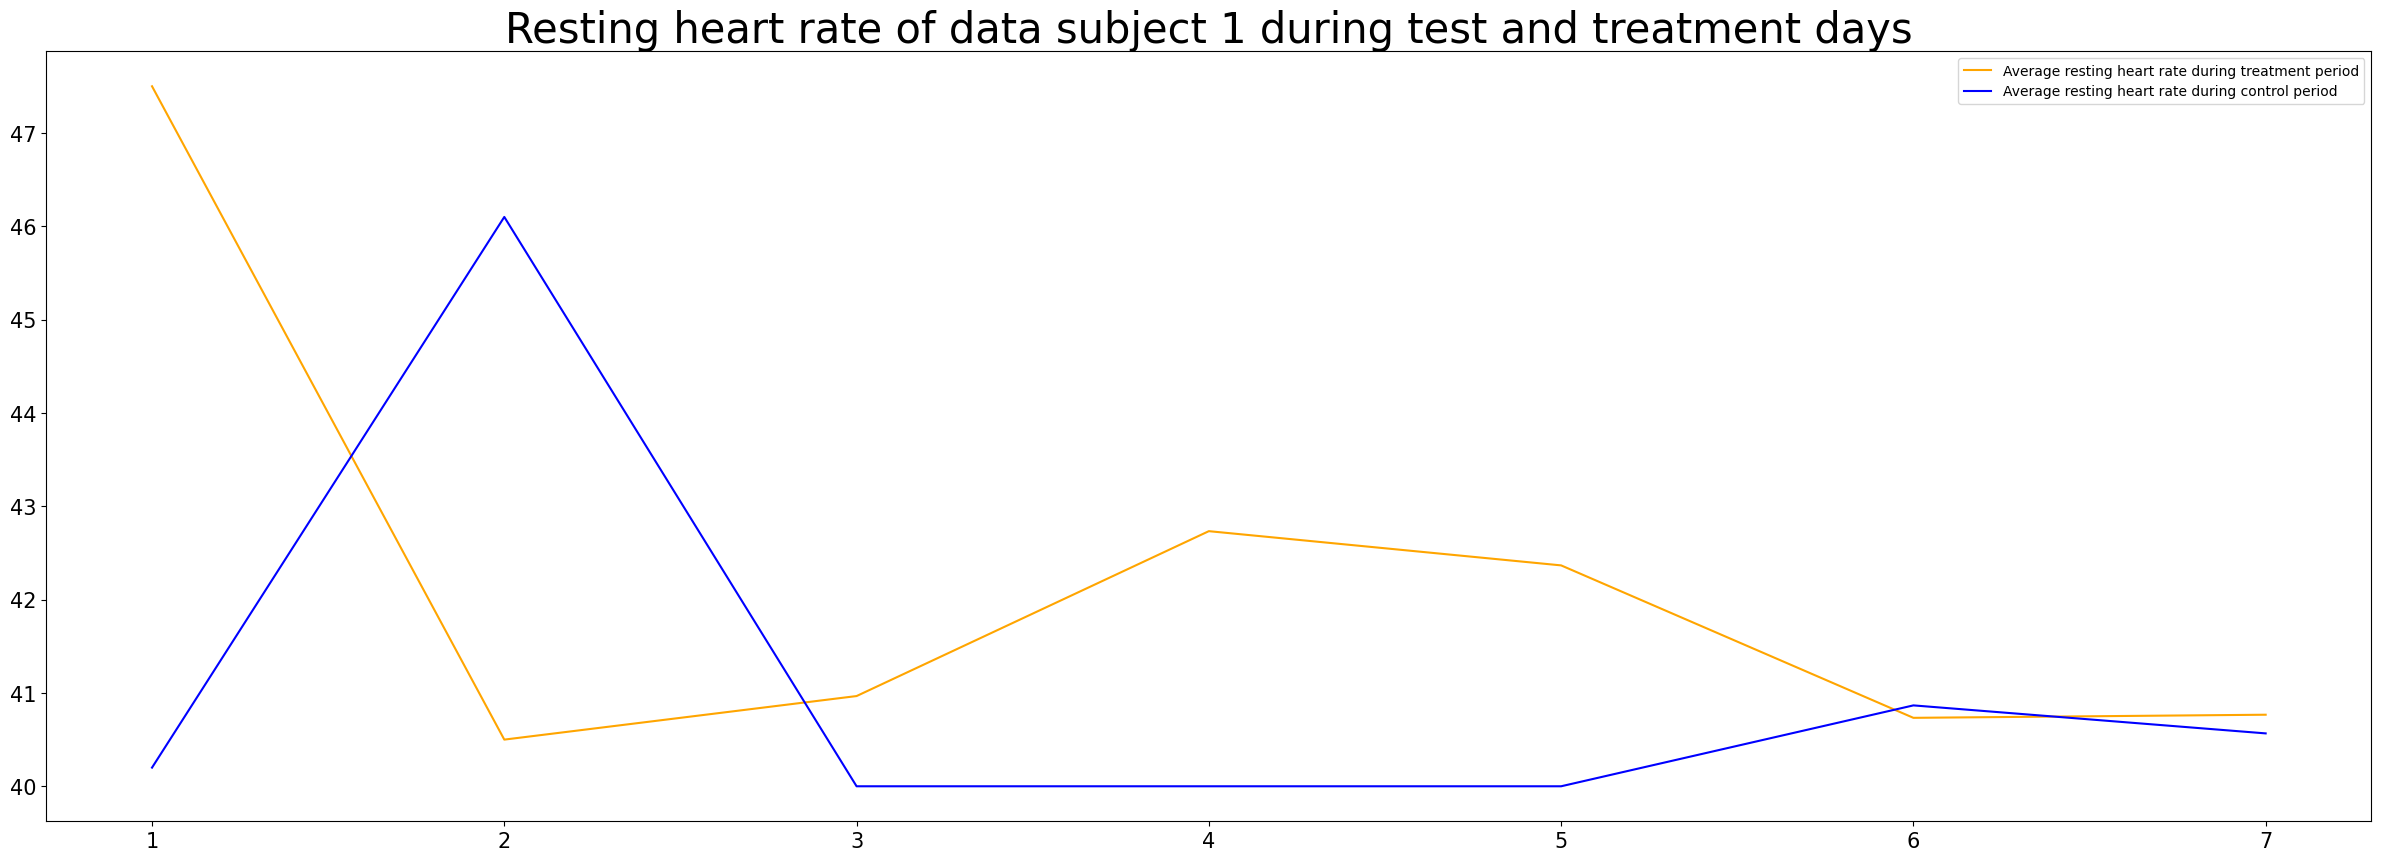

In [63]:
fig, ax1 = plt.subplots(figsize=(30, 10))

ax1.plot(Tjielke_treatment['days'], Tjielke_treatment['lowest_30_heartrates'], color = 'orange')
ax1.plot(Tjielke_control['days'], Tjielke_control['lowest_30_heartrates'], color = 'blue')
#ax1.bar(Tjielke_treatment['days'], Tjielke_treatment['activity_before_bed'])
#ax1.bar(Tjielke_control['days'], Tjielke_control['activity_before_bed'])

plt.title('Resting heart rate of data subject 1 during test and treatment days', fontsize=30)
plt.xticks(size = 15,rotation = 0)
plt.yticks(size = 15)
plt.legend(['Average resting heart rate during treatment period','Average resting heart rate during control period']);

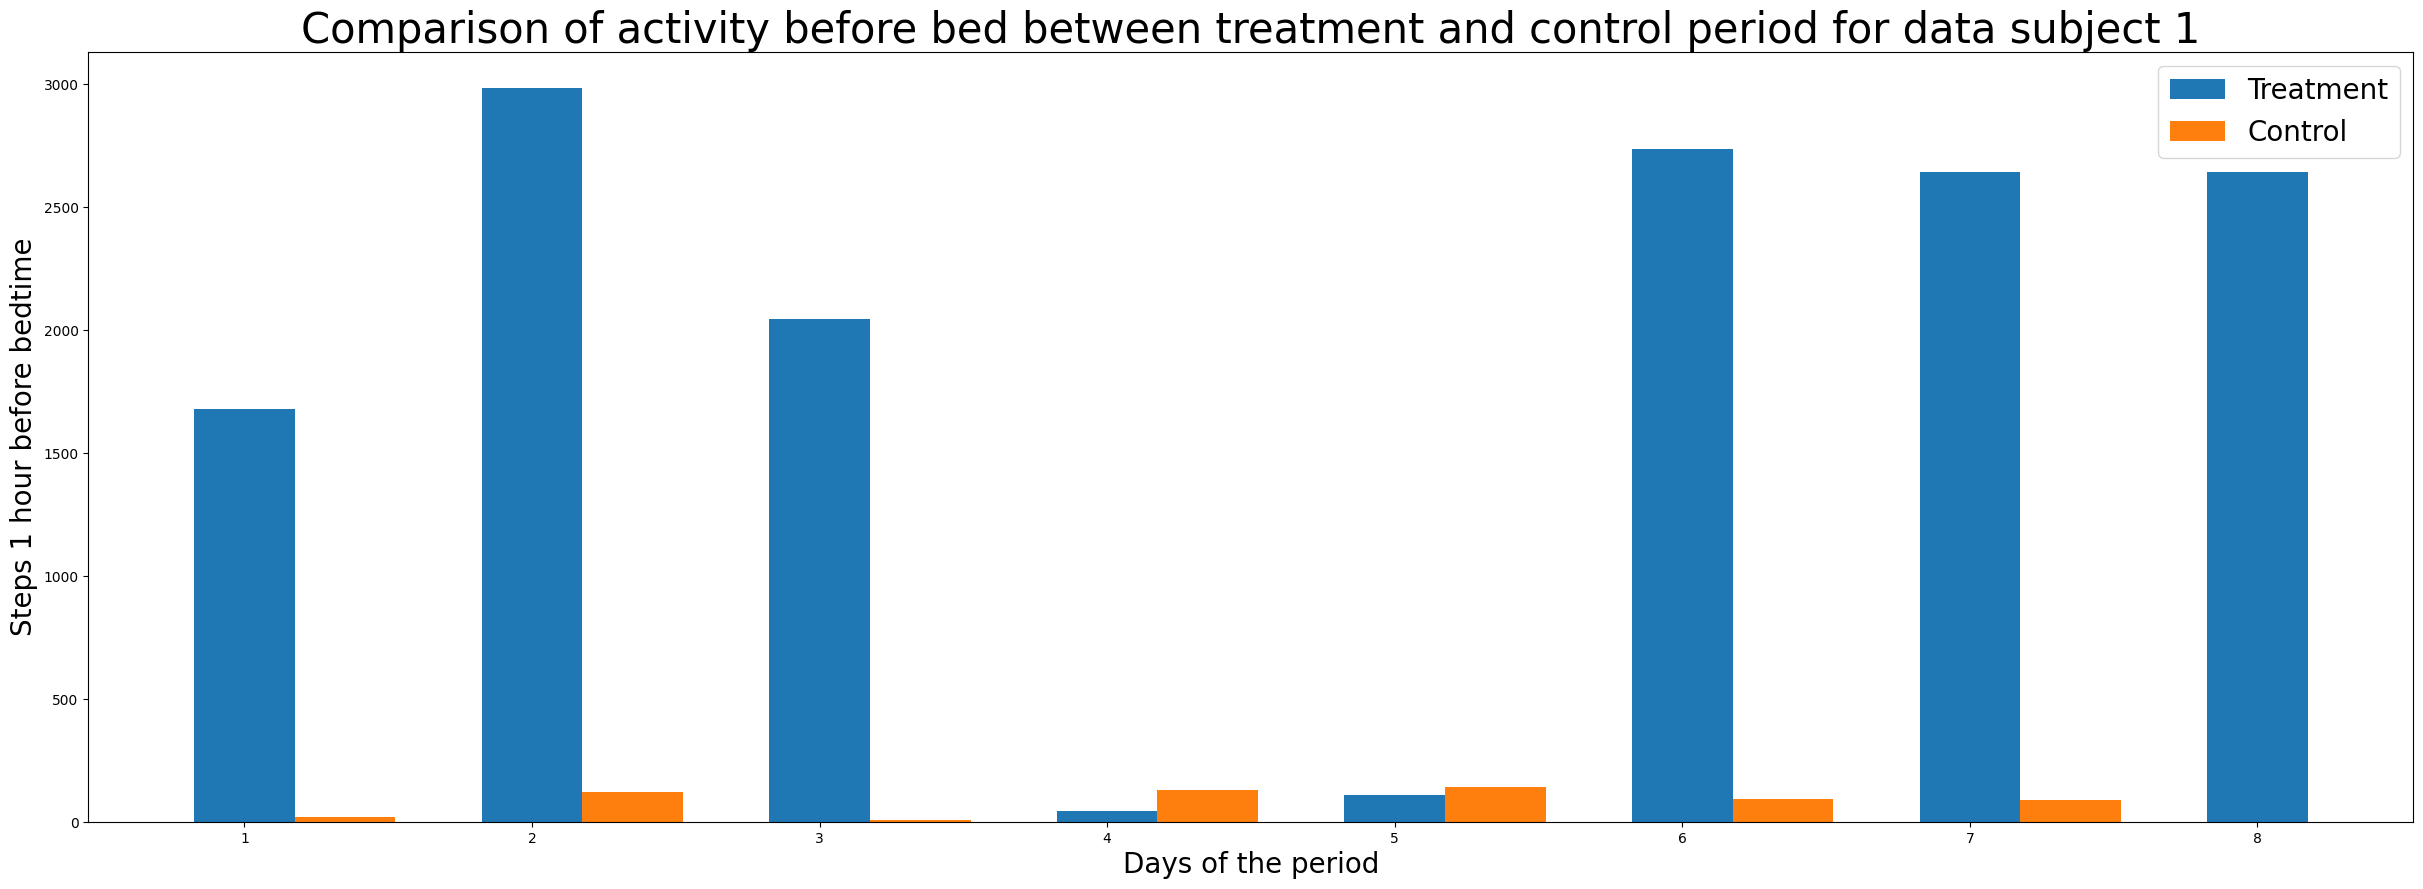

In [181]:
fig, ax = plt.subplots(figsize=(30, 10))

bar_width = 0.35

plt.bar(x = Tjielke_treatment['days'], height = Tjielke_treatment['activity_before_bed'], width=bar_width, label='Treatment')

plt.bar(x = [x + bar_width for x in Tjielke_control['days']], height = Tjielke_control['activity_before_bed'], width=bar_width, label='Control')

plt.xlabel('Days of the period', size = 20)
plt.ylabel('Steps 1 hour before bedtime', size = 20)
plt.title('Comparison of activity before bed between treatment and control period for data subject 1', size=30)
plt.legend(prop={'size': 20})

# Show the plot
plt.show()

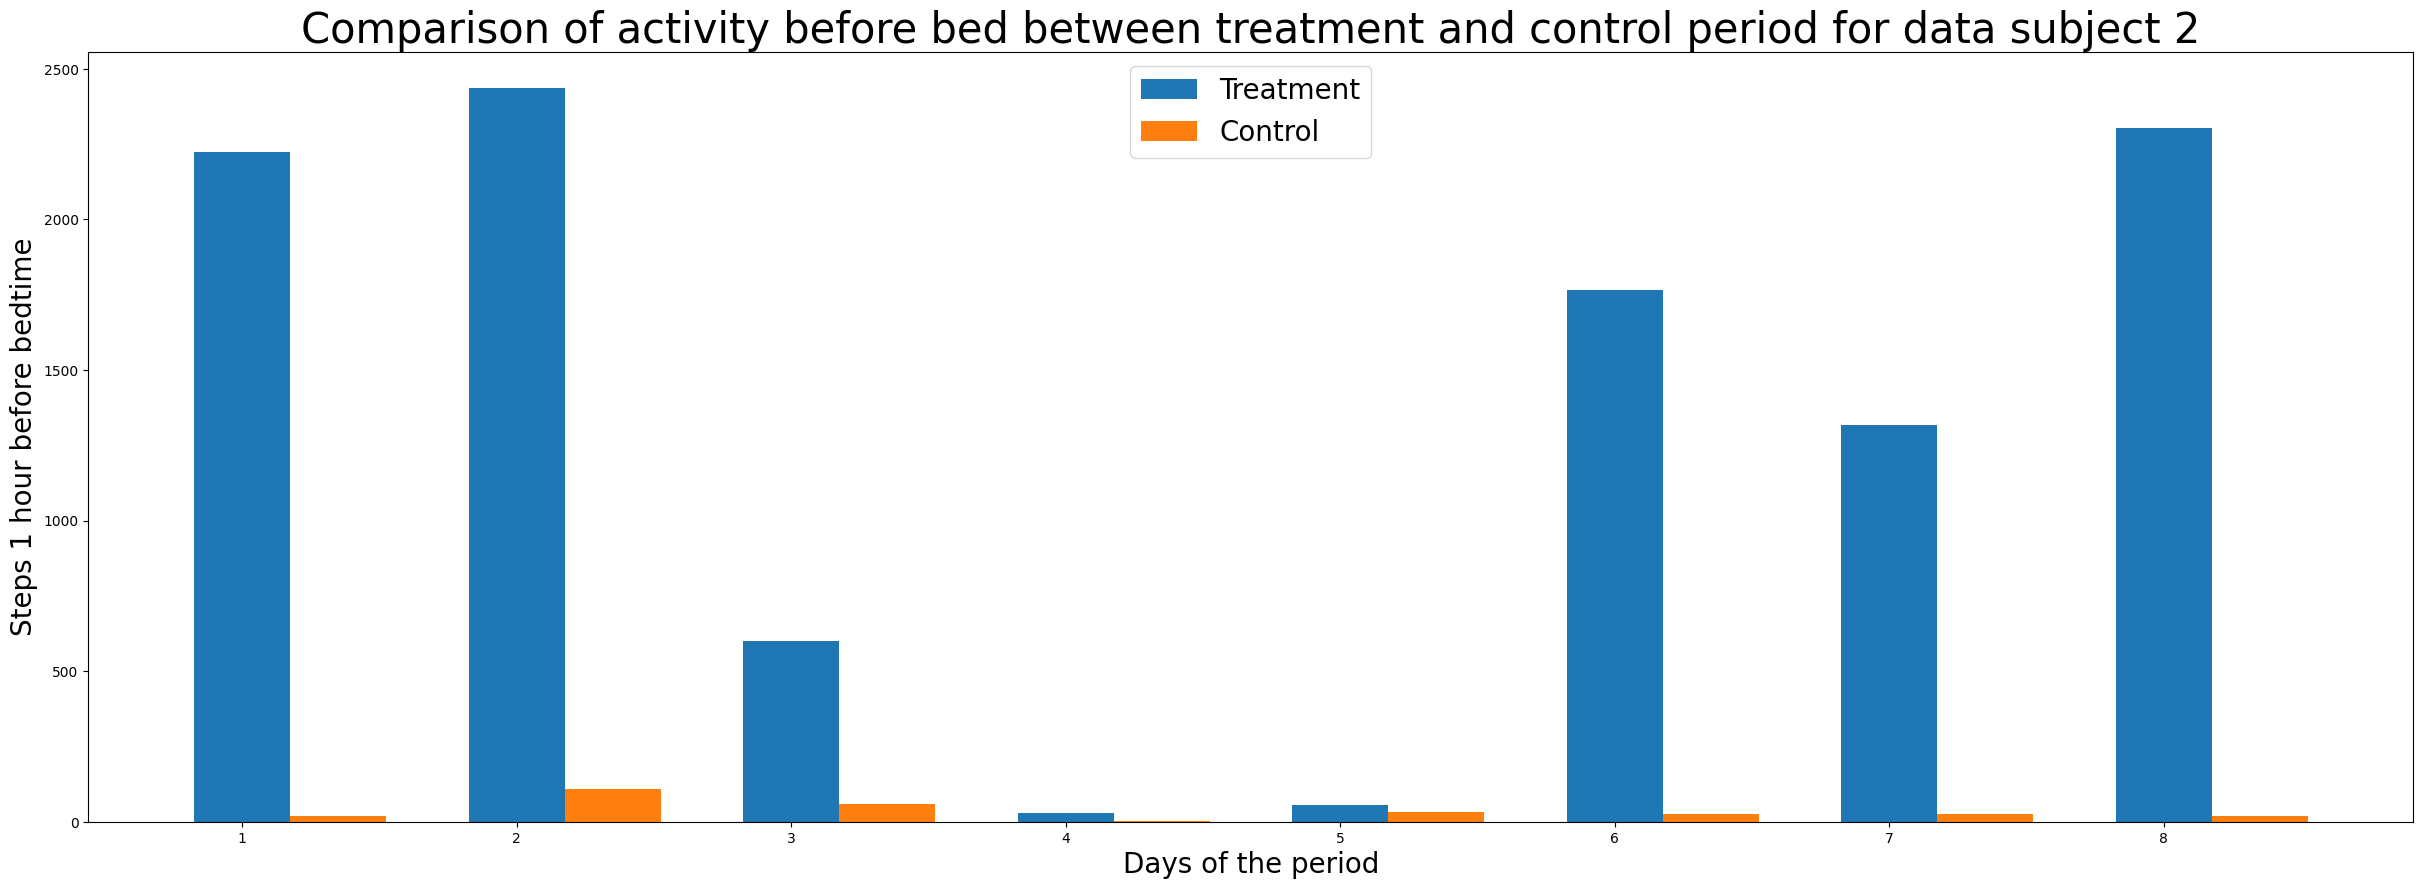

In [182]:
fig, ax = plt.subplots(figsize=(30, 10))

bar_width = 0.35

plt.bar(x = George_treatment['days'], height = George_treatment['activity_before_bed'], width=bar_width, label='Treatment')

plt.bar(x = [x + bar_width for x in George_control['days']], height = George_control['activity_before_bed'], width=bar_width, label='Control')

plt.xlabel('Days of the period', size = 20)
plt.ylabel('Steps 1 hour before bedtime', size = 20)
plt.title('Comparison of activity before bed between treatment and control period for data subject 2', size=30)
plt.legend(prop={'size': 20})

# Show the plot
plt.show()

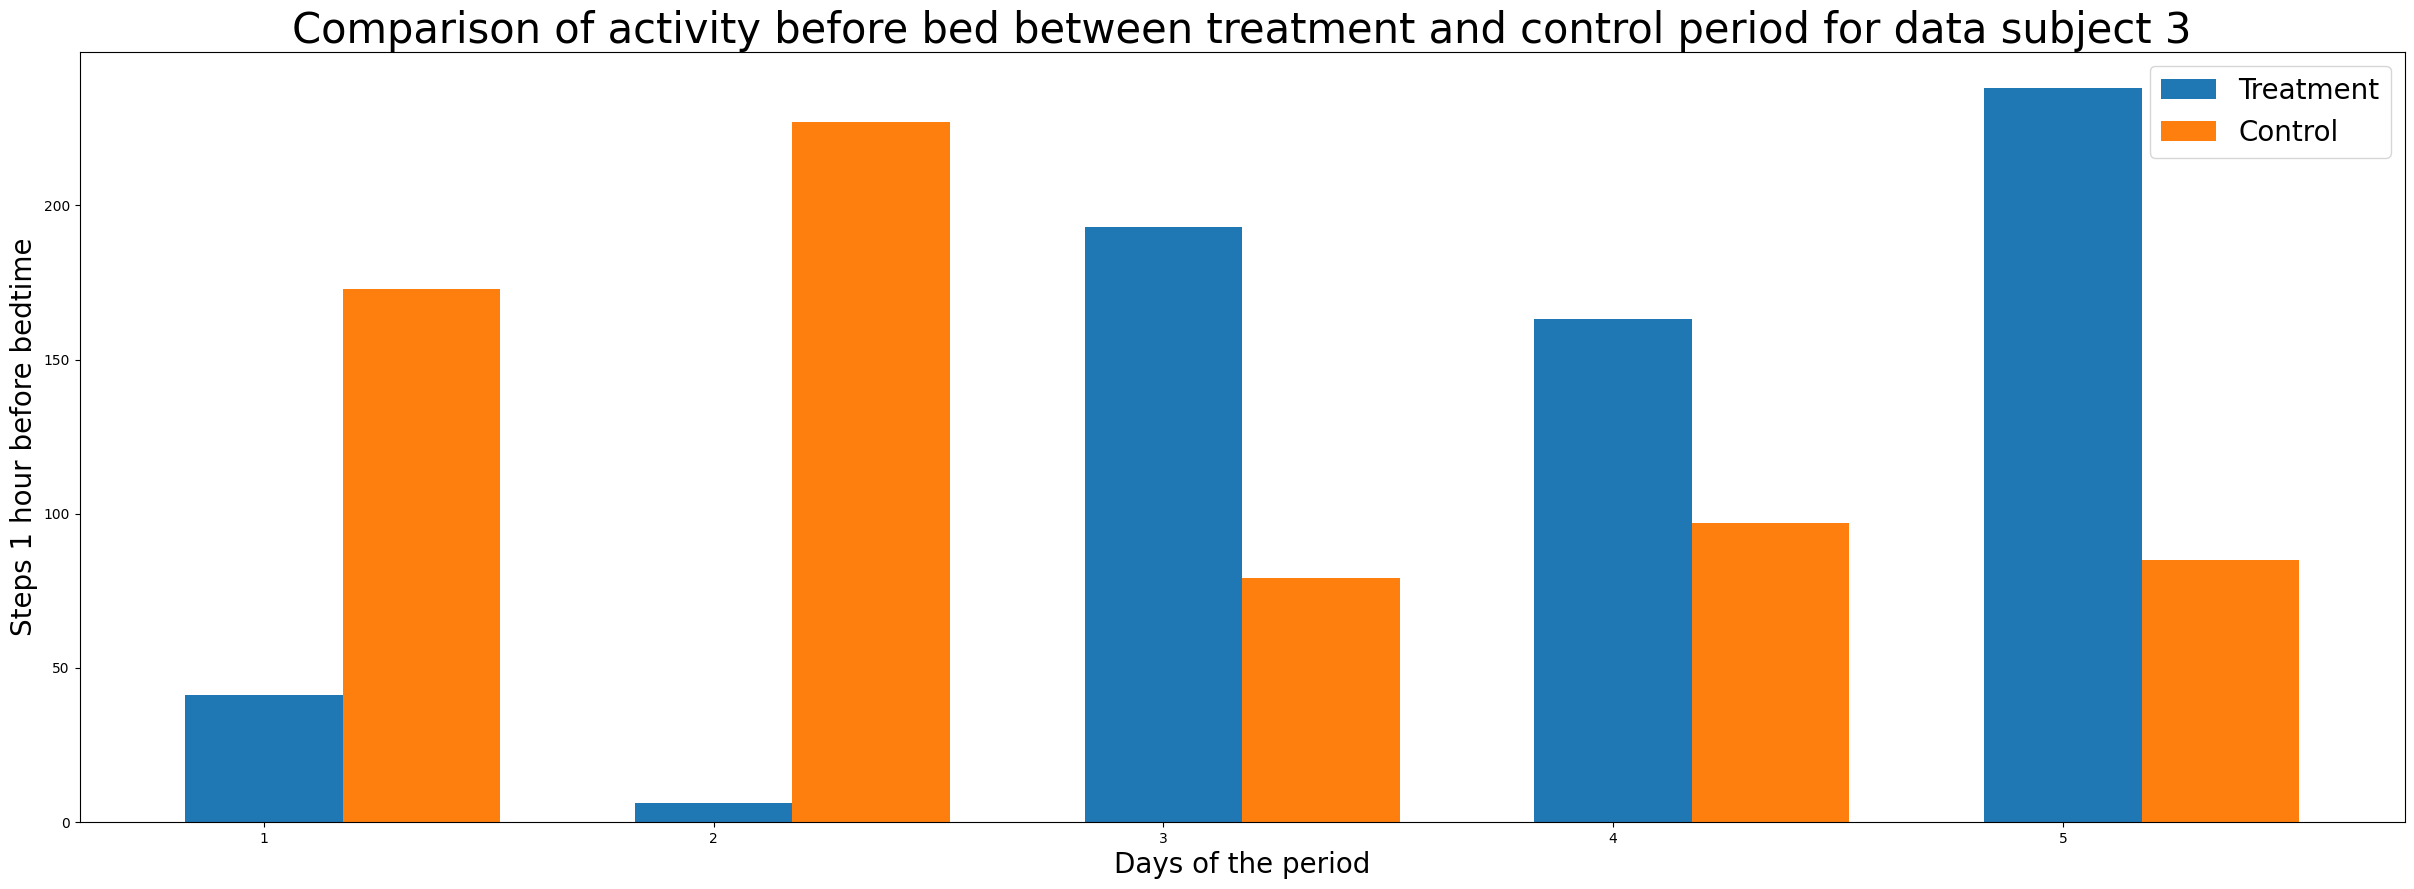

In [183]:
fig, ax = plt.subplots(figsize=(30, 10))

bar_width = 0.35

plt.bar(x = Yidan_treatment['days'], height = Yidan_treatment['activity_before_bed'], width=bar_width, label='Treatment')

plt.bar(x = [x + bar_width for x in Yidan_control['days']], height = Yidan_control['activity_before_bed'], width=bar_width, label='Control')

plt.xlabel('Days of the period', size = 20)
plt.ylabel('Steps 1 hour before bedtime', size = 20)
plt.title('Comparison of activity before bed between treatment and control period for data subject 3', size=30)
plt.legend(prop={'size': 20})

# Show the plot
plt.show()

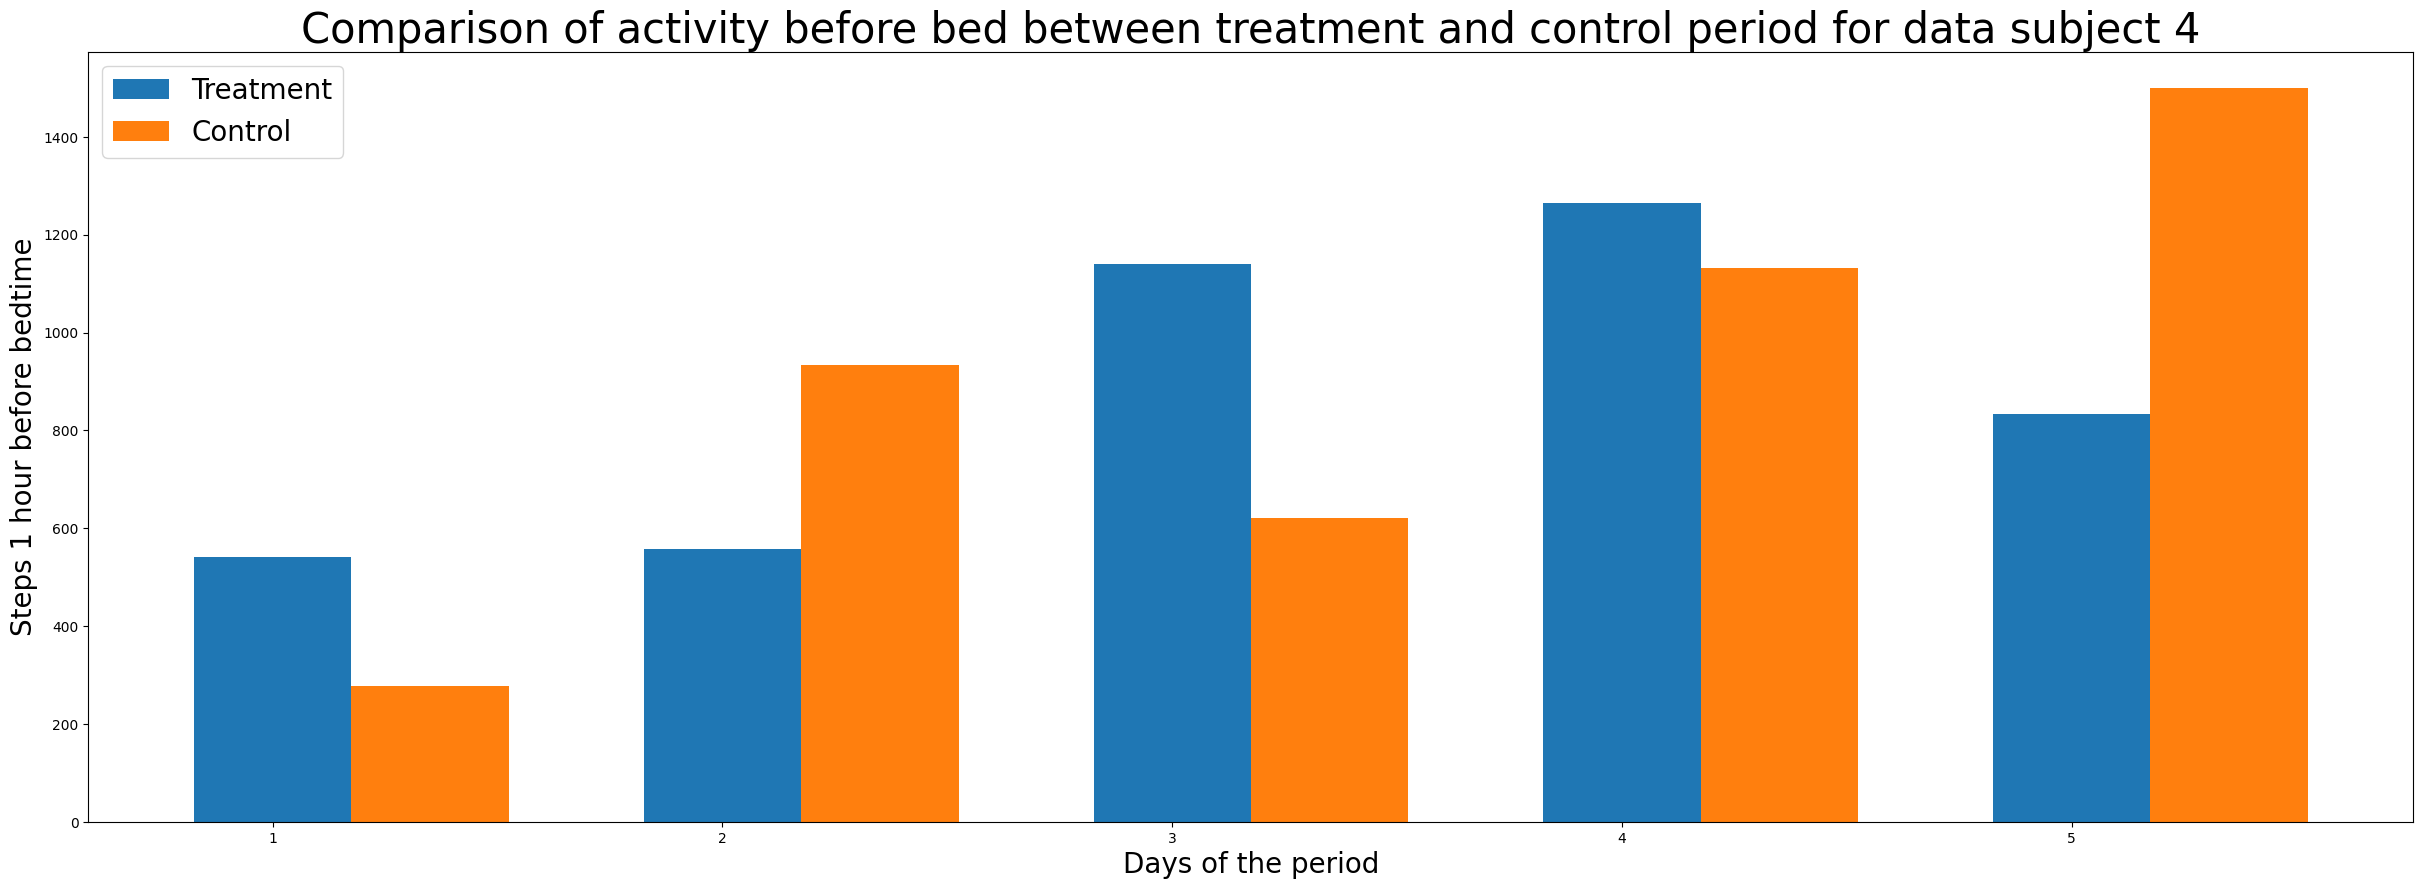

In [184]:
fig, ax = plt.subplots(figsize=(30, 10))

bar_width = 0.35

plt.bar(x = Lars_treatment['days'], height = Lars_treatment['activity_before_bed'], width=bar_width, label='Treatment')

plt.bar(x = [x + bar_width for x in Lars_control['days']], height = Lars_control['activity_before_bed'], width=bar_width, label='Control')

plt.xlabel('Days of the period', size = 20)
plt.ylabel('Steps 1 hour before bedtime', size = 20)
plt.title('Comparison of activity before bed between treatment and control period for data subject 4', size=30)
plt.legend(prop={'size': 20})

# Show the plot
plt.show()

In [204]:
concattreat = pd.concat([Tjielke_treatment, George_treatment])
treatmentgroup = concattreat.groupby('days')['lowest_30_heartrates'].mean()

In [205]:
concatcont = pd.concat([Tjielke_control, George_control])
controlgroup = concatcont.groupby('days')['lowest_30_heartrates'].mean()

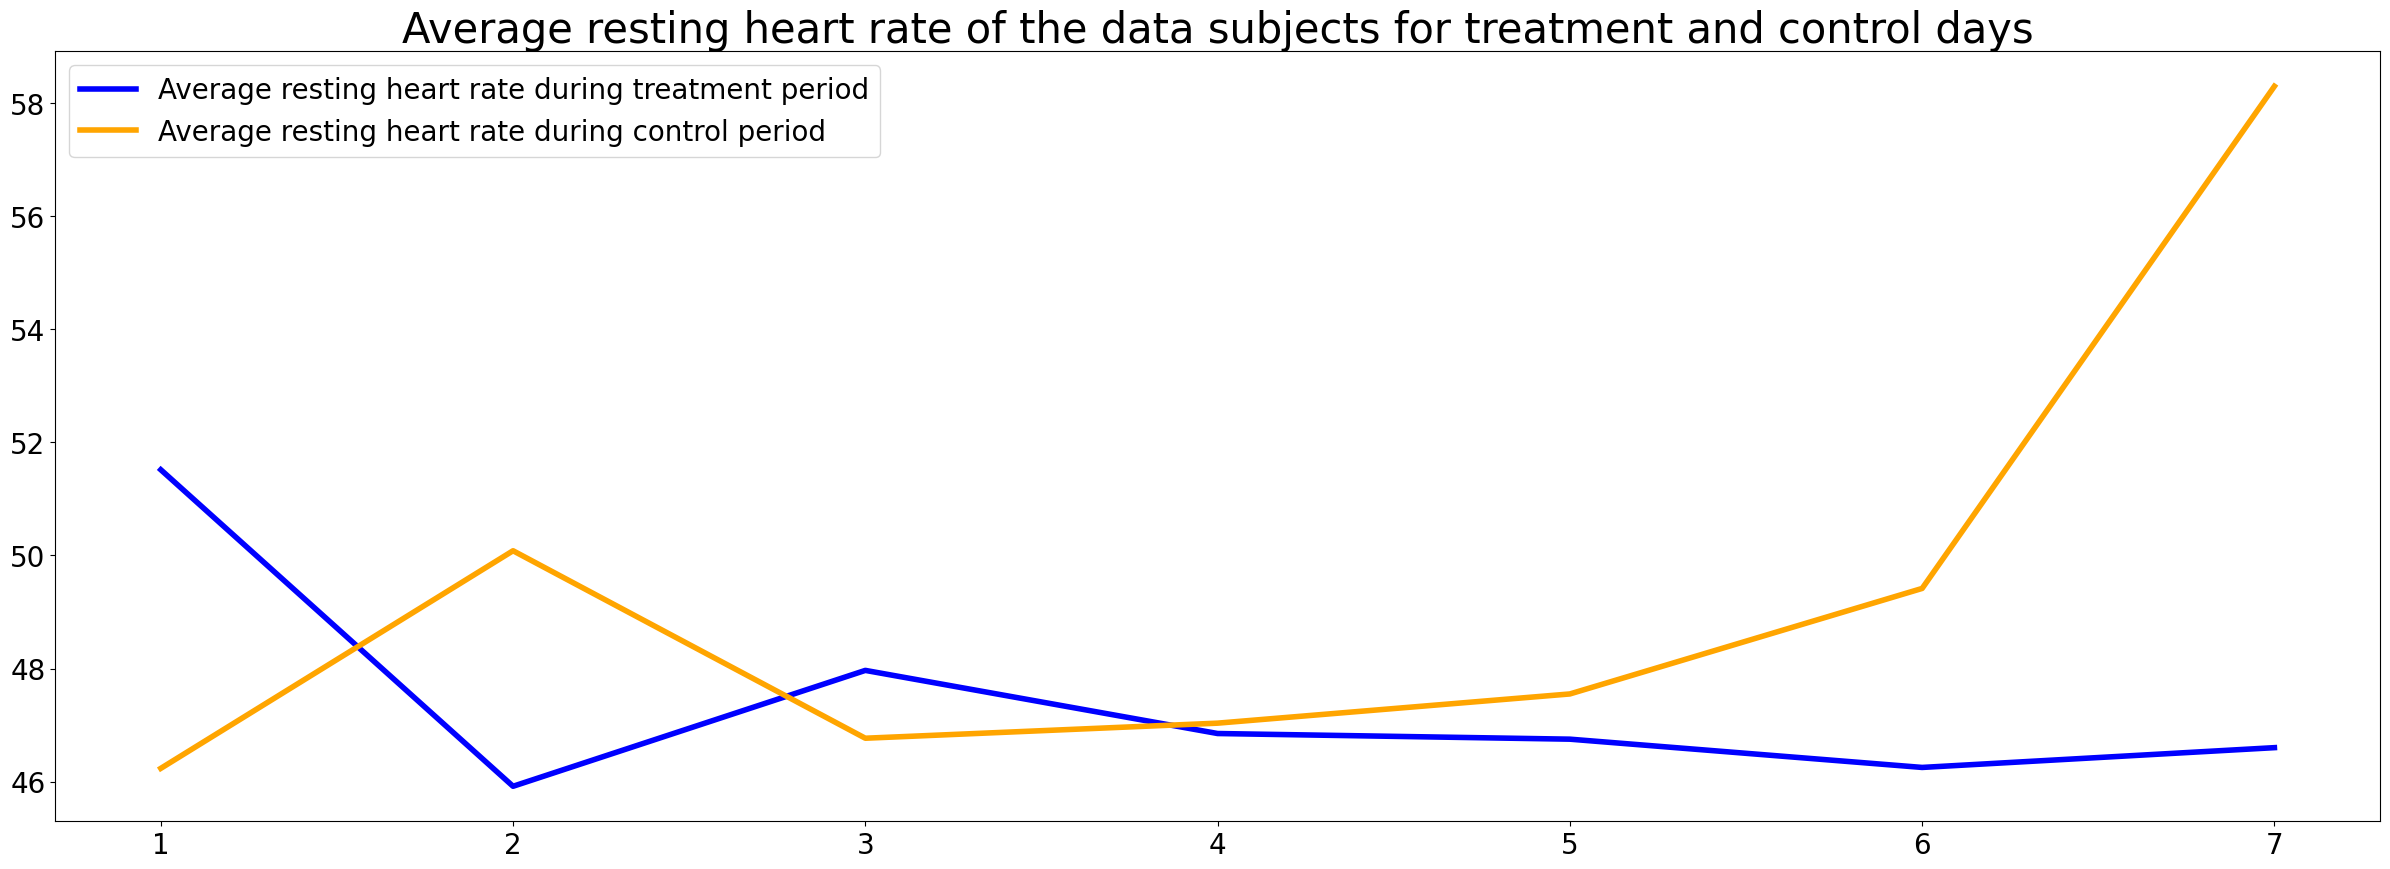

In [215]:
fig, ax1 = plt.subplots(figsize=(30, 10))

ax1.plot(treatmentgroup, color = 'blue', linewidth=4)
ax1.plot(controlgroup, color = 'orange',linewidth=4)

plt.title('Average resting heart rate of the data subjects for treatment and control days', fontsize=30)
plt.xticks(size = 20,rotation = 0)
plt.yticks(size = 20)
plt.legend(['Average resting heart rate during treatment period','Average resting heart rate during control period'], prop={'size':20});

In [217]:
from scipy.stats import ttest_rel   # Import the library

t_statistic, p_value = ttest_rel(treatmentgroup, controlgroup)  # Use the t-test function
one_tailed_p_value = p_value / 2    # The t-test is one-tailed since we want to see whether the mean of the treatment period is smaller

print("One-tailed paired t-test results (less than):")
print("T-statistic:", t_statistic)
print("One-tailed p-value:", one_tailed_p_value)


alpha = 0.05    # Set the significance level
if one_tailed_p_value < alpha:
    print("The mean of the treatment group is significantly less than the mean of the control group.")
else:
    print("There is not enough evidence to conclude that the mean of the treatment group is less than the mean of control group.")


One-tailed paired t-test results (less than):
T-statistic: -0.9662593514998472
One-tailed p-value: 0.18561520922296734
There is not enough evidence to conclude that the mean of the treatment group is less than the mean of control group.
